In [326]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

mu = 0.2
a = 5
b = 10

$\textbf{Question 1}$

$$ h(s)=\frac{f(s)}{1-F(s)}= \left\{
    \begin{array}{ll}
        \frac{\mu\exp(-\mu s)}{\exp(-\mu s)} & \mbox{si } s \in \mathbb{R}_+ \\
        0 & \mbox{sinon.}
    \end{array}
\right. = \mu \mathbb{1}_{\mathbb{R}_+}(s) $$

$\textbf{Question 2}$

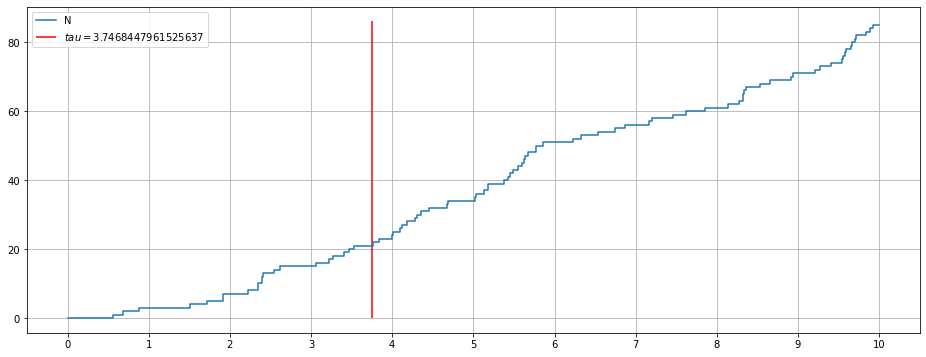

In [332]:
# Tirage de tau
# taus = []
# for i in range(1000) :
#     u = np.random.uniform()
#     tau = -1/mu*np.log(u)
#     taus.append(tau)
    
# plt.hist(taus)
# plt.plot()

#TODO np.random.seed(42)

u = np.random.uniform()
tau = -1/mu*np.log(u)

# Tirage des instants de saut de Na
Tas = []
t = 0
while t <= min(tau, 10):
    u = np.random.uniform()
    t += -1/a*np.log(u)
    Tas.append(t)
Tas.pop()
    
# Tirage des instants de saut de Nb
Tbs = []
t = tau
while t <= 10:
    u = np.random.uniform()
    t += -1/b*np.log(u)
    Tbs.append(t)
if Tbs:
    Tbs.pop()    

plt.figure(figsize = (16,6))
plt.step([0] + Tas + Tbs + [10], [0] + [i for i in range(len(Tas + Tbs) + 1)], label="N")
if tau <= 10:
    plt.vlines(tau, 0, len(Tas + Tbs) + 1, color='r', label=f"$tau = {tau}$")
else:
    plt.vlines(0, 0, 0, color='r', label=f"$tau = {tau}$")
plt.legend()
plt.xticks(range(11))
plt.grid()

In [328]:
def N(t) :
    return len([e for e in Tas+Tbs if e <= t])

$\textbf{Question 3}$

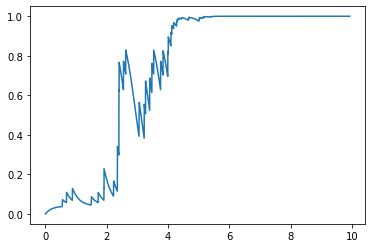

In [333]:
def dZ(y, t):
    return (mu - (b - a)*y)*(1 - y)

# Calcul de Z
def Z(num):
    z = [0]
    ts = []
    T = [0] + Tas + Tbs
    for i in range(len(T) - 1):
        t = np.linspace(T[i], T[i+1], num)[:-1]
        ts += list(t)
        z = np.append(z, odeint(dZ, z[-1], t).flatten())
        zjump = (b-a)*z[-1]*(1 - z[-1])/(a + (b-a)*z[-1])
        z = np.append(z, zjump + z[-1])
        ts.append(T[i+1])
    return ts, z[1:]

z = Z(50)
plt.plot(z[0], z[1])

$\textbf{Estimation tau ???}$

$\textbf{Estimation tau ???}$

$\textbf{Estimation tau ???}$

$\textbf{Estimation tau ???}$

$\textbf{Estimation tau ???}$

$\textbf{Estimation tau ???}$

$\textbf{Estimation tau ???}$

$\textbf{Question 4}$